In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv('/content/stud.csv')

df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [51]:
df.shape

(1000, 8)


**3. Data Checks to perform**
```
Check Missing values
Check Duplicates
Check data type
Check the number of unique values of each column
Check statistics of data set
Check various categories present in the different categorical column
```



In [52]:
df.isna().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


Insights - No missing values present

In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
df.dtypes

,0
gender,object
race_ethnicity,object
parental_level_of_education,object
lunch,object
test_preparation_course,object
math_score,int64
reading_score,int64
writing_score,int64


In [55]:
df.nunique()

,0
gender,2
race_ethnicity,5
parental_level_of_education,6
lunch,2
test_preparation_course,2
math_score,81
reading_score,72
writing_score,77


In [56]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [57]:
# separating numerical column and categorical column

cat_col = df.select_dtypes(exclude = 'number').columns
num_col = df.select_dtypes(include = 'number').columns


In [58]:
df['total_score'] =  df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<Axes: xlabel='average', ylabel='Count'>

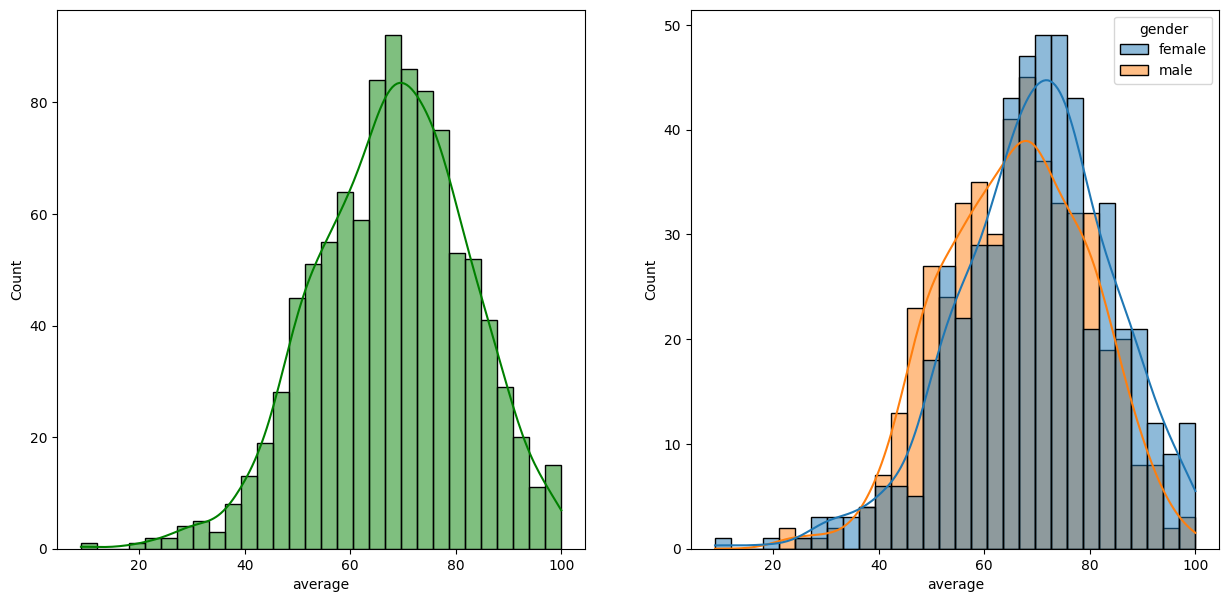

In [59]:
### Explore More Visualization

fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

<Axes: xlabel='average', ylabel='Count'>

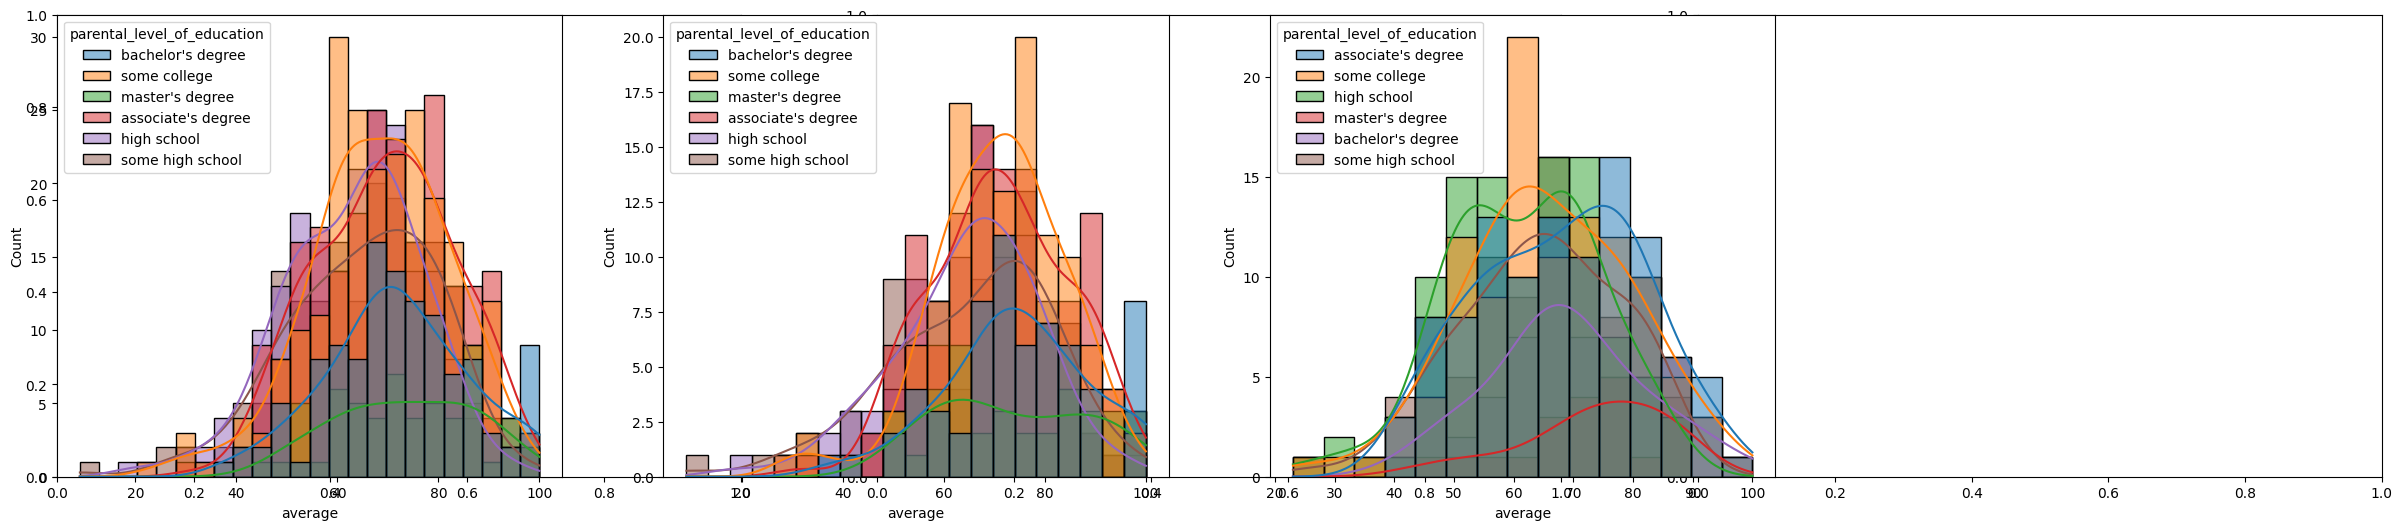

In [60]:
plt.subplots(1,3,figsize=(30,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')

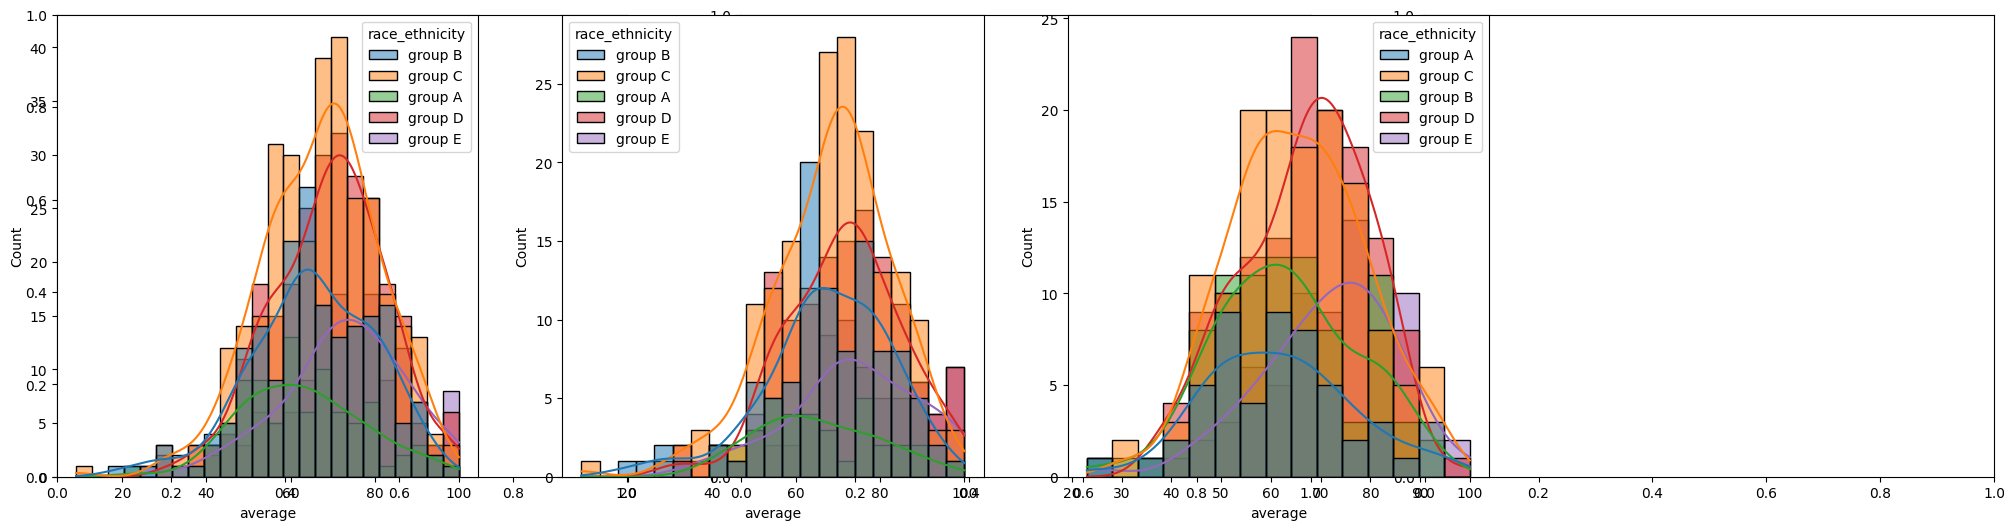

In [61]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

In [62]:
num_col = df.select_dtypes(include='number').columns
corr_matrix = df[num_col].corr()
print(corr_matrix)


               math_score  reading_score  writing_score  total_score   average
math_score       1.000000       0.817580       0.802642     0.918746  0.918746
reading_score    0.817580       1.000000       0.954598     0.970331  0.970331
writing_score    0.802642       0.954598       1.000000     0.965667  0.965667
total_score      0.918746       0.970331       0.965667     1.000000  1.000000
average          0.918746       0.970331       0.965667     1.000000  1.000000
